# You work for a financial institution, and your task is to develop a credit risk assessment model using 
Support Vector Machines (SVM). The dataset contains information about applicants' financial history, 
personal details, and credit risk outcomes (e.g., good or bad credit). Your goal is to build classification 
models with both linear and non-linear kernels and evaluate their performance. Answer the following 
questions based on this case study:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
data=pd.read_csv('credit_risk.csv')
data

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0
2,2,25,9600,1,5500,12.87,1,3,0
3,3,23,65500,4,35000,15.23,1,2,0
4,4,24,54400,8,35000,14.27,1,4,1
...,...,...,...,...,...,...,...,...,...
94,94,23,62500,7,26000,11.71,1,2,0
95,95,23,120000,1,25600,12.69,0,3,0
96,96,24,12360,2,1600,13.57,0,3,0
97,97,22,60000,0,25475,10.99,1,3,0


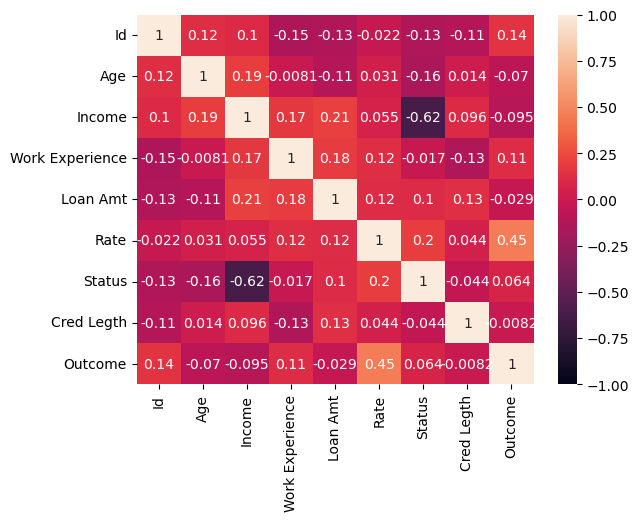

In [4]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Loan Amt'}>,
        <Axes: title={'center': 'Rate'}>],
       [<Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'Cred Legth'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

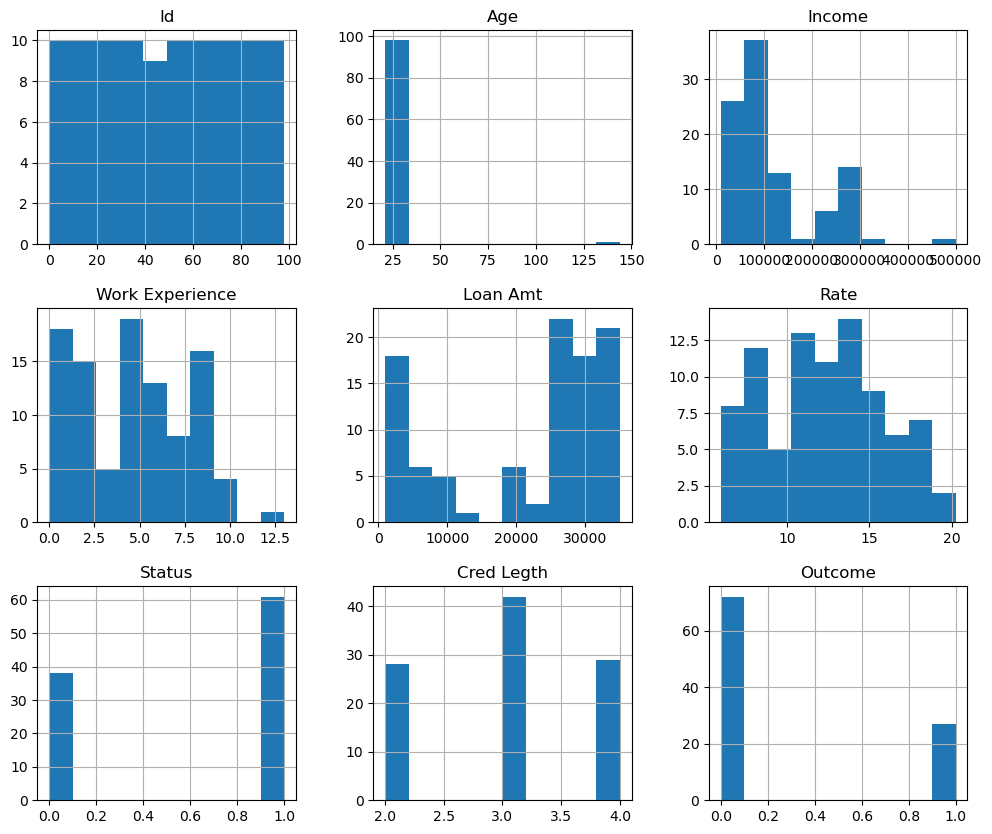

In [5]:
data.hist(figsize=(12,10))

C:\Users\Rithika Patil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


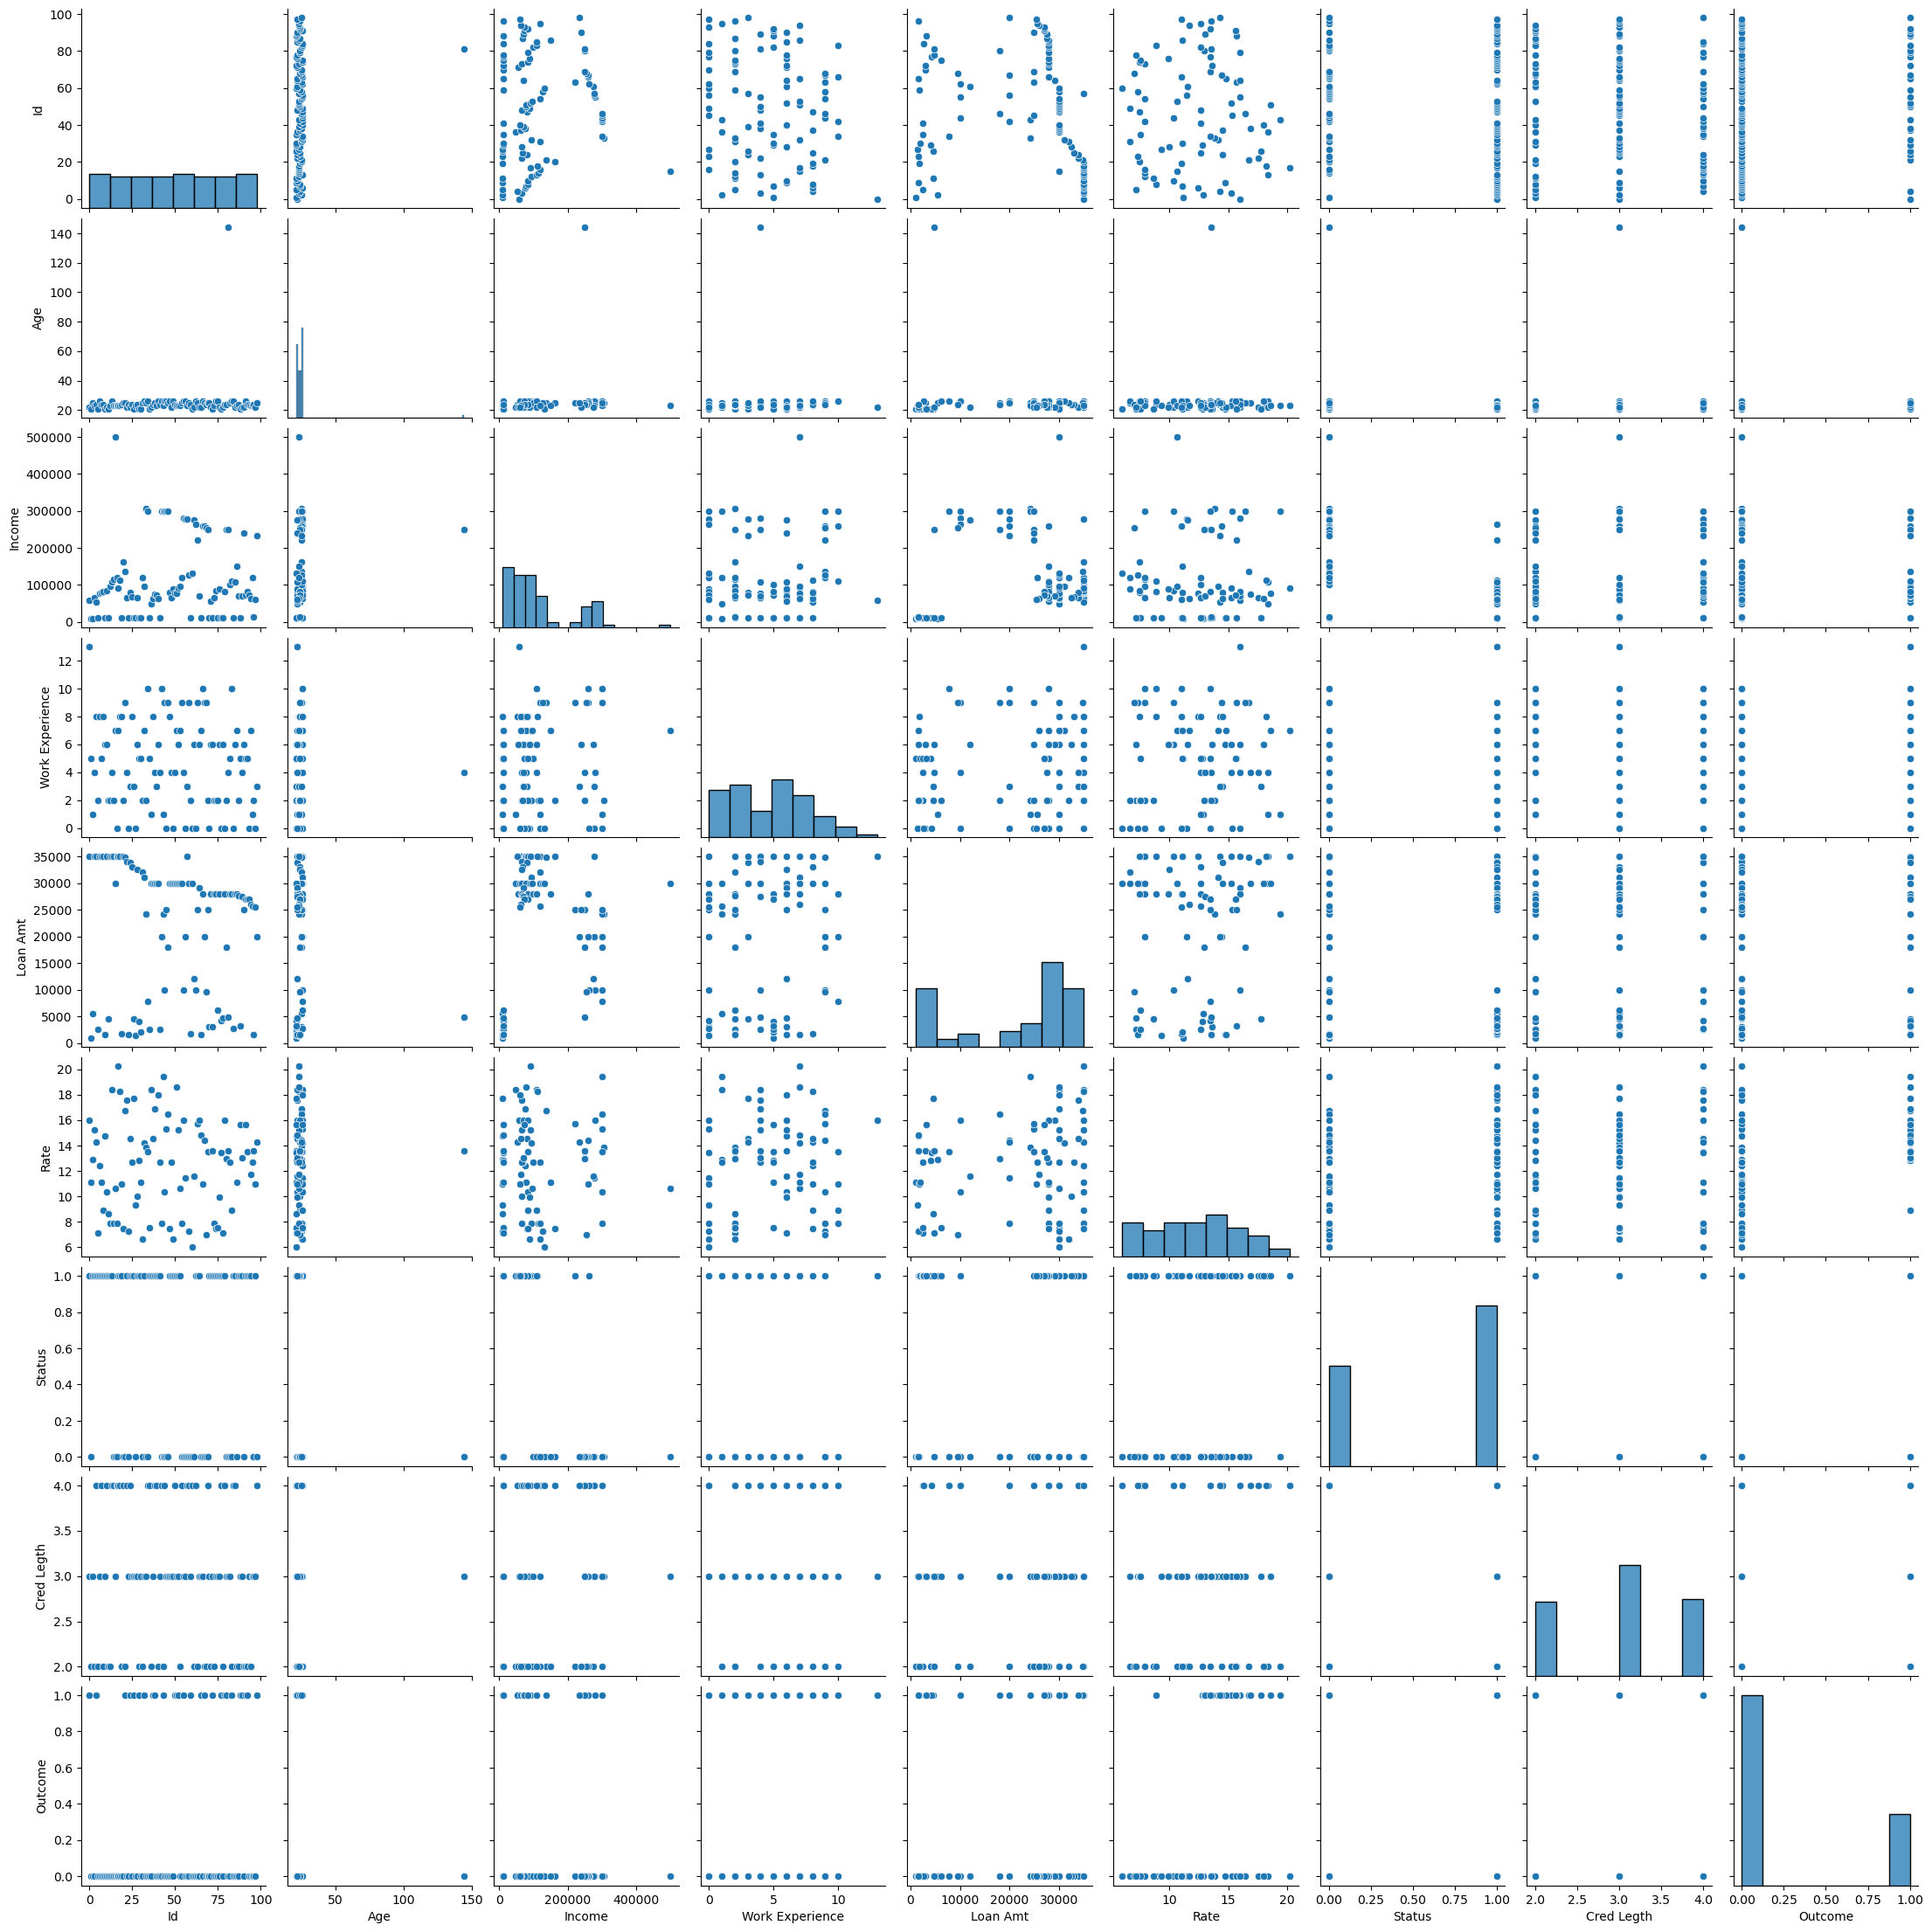

In [6]:
sns.pairplot(data)

In [7]:
data.isna().sum()

Id                  0
Age                 0
Income              0
Work Experience     0
Loan Amt            0
Rate               12
Status              0
Cred Legth          0
Outcome             0
dtype: int64

In [8]:
data=data.fillna(method='bfill')
data.isna().sum()

Id                 0
Age                0
Income             0
Work Experience    0
Loan Amt           0
Rate               0
Status             0
Cred Legth         0
Outcome            0
dtype: int64

In [9]:
data.head(2)

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0


In [10]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]
print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)


X shape:	 (99, 8)

Y shape:	 (99, 1)


In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (89, 8)

Training data-y- Shape:	 (89, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (10, 8)

Testing data(y-Outcome) Shape:	 (10, 1)


In [12]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset (assuming it's in a DataFrame)
# X should contain features, and y should contain the target (credit risk)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a linear SVM classifier
linear_svm_classifier = svm.SVC(kernel='linear')

# Train the linear SVM model
linear_svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_svm_classifier.predict(X_test)

# Evaluate the linear SVM model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.75
Precision: 0.33
Recall: 0.25
F1-Score: 0.29


In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'X' contains your feature data and 'y' contains the target labels (good or bad credit)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a non-linear SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_rbf.predict(X_test)


C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn import svm

# Create and train a linear SVM model
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(x, y)

# Access the support vectors for the linear model
linear_support_vectors = linear_svm.support_vectors_

# Create and train a non-linear SVM model with an RBF kernel
rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(x, y)

# Access the support vectors for the non-linear model
rbf_support_vectors = rbf_svm.support_vectors_

C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
support_reg=SVR(kernel='linear')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [-111.28080427   57.68971718  573.62692678  116.16508138  544.45711363
  -21.30986416 -385.05676806  -14.83135712   -2.69889414 -399.77367937]
Mean Squared Error:	 96322.49893859432

RMSE:	 310.3586617747188

R-Square value:	 -1070248.9882066033


In [17]:
support_reg=SVR()
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [0.09977705 0.10055428 0.09968062 0.09976971 0.10003928 0.1005636
 0.10050913 0.10056517 0.09985754 0.09988791]
Mean Squared Error:	 0.09007028887228205

RMSE:	 0.30011712525659384

R-Square value:	 -0.000780987469800376


C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
support_reg=SVR(kernel='sigmoid')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [-1.85152622  1.63895944  9.24996946 -1.54920676 -0.05241822  1.69405772
  2.01802038  1.68792149 -1.54526869 -0.66215541]
Mean Squared Error:	 11.079509703254194

RMSE:	 3.328589746912977

R-Square value:	 -122.10566336949103


C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Support Vector Classification model

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set()
from scipy import stats
%matplotlib inline

In [20]:
data=pd.read_csv('credit_risk.csv')
data

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0
2,2,25,9600,1,5500,12.87,1,3,0
3,3,23,65500,4,35000,15.23,1,2,0
4,4,24,54400,8,35000,14.27,1,4,1
...,...,...,...,...,...,...,...,...,...
94,94,23,62500,7,26000,11.71,1,2,0
95,95,23,120000,1,25600,12.69,0,3,0
96,96,24,12360,2,1600,13.57,0,3,0
97,97,22,60000,0,25475,10.99,1,3,0


In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(xtrain, ytrain)

C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [22]:
y_pred = svm_classifier.predict(xtest)

In [23]:
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(xtrain, ytrain)


C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [26]:
y_pred = svm_classifier.predict(xtest)

In [27]:
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set()
from scipy import stats
%matplotlib inline

In [17]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
data=pd.read_csv('credit_risk.csv')
data.head()
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

NameError: name 'y' is not defined

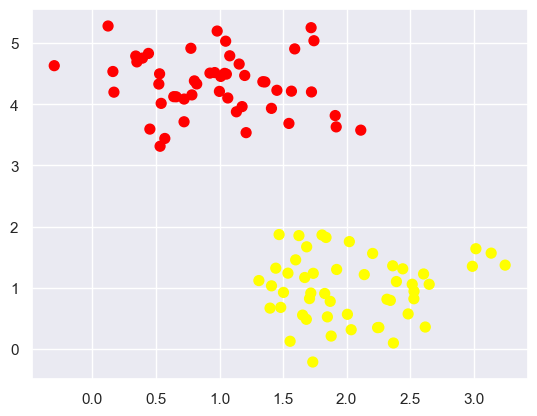

In [31]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')


(-1.0, 4.0)

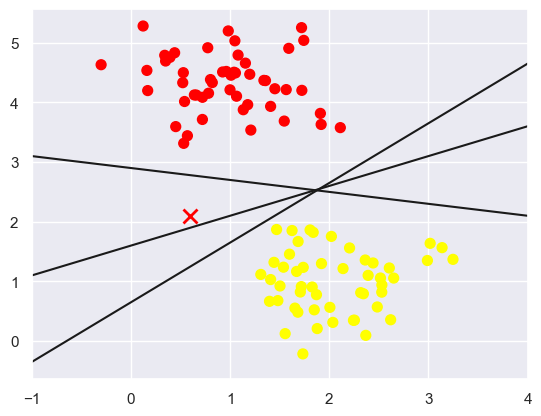

In [32]:
xfit=np.linspace(-1,4)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1,4)

(-1.0, 3.5)

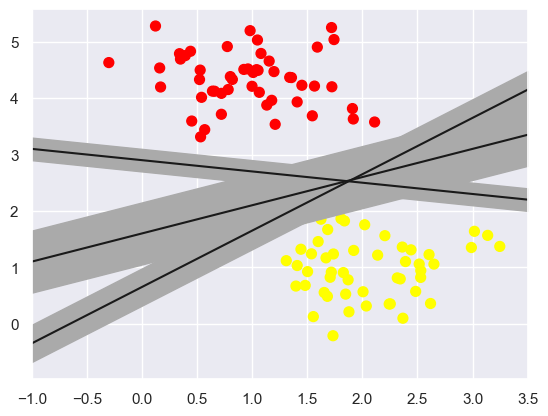

In [33]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA')
plt.xlim(-1,3.5)


In [34]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x,y)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [35]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
 
 # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
 
 # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
 
 # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


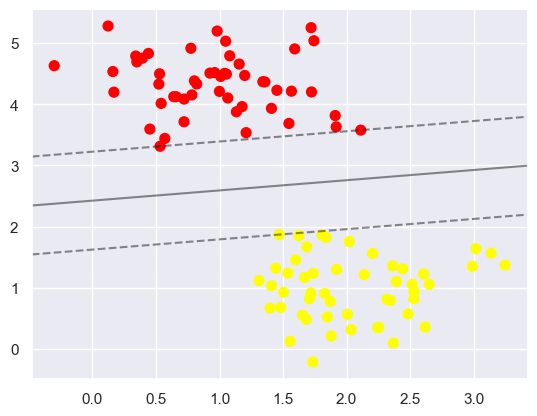

In [36]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

In [37]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

# Face Recognition with SVC

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print()
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']

(1140, 62, 47)


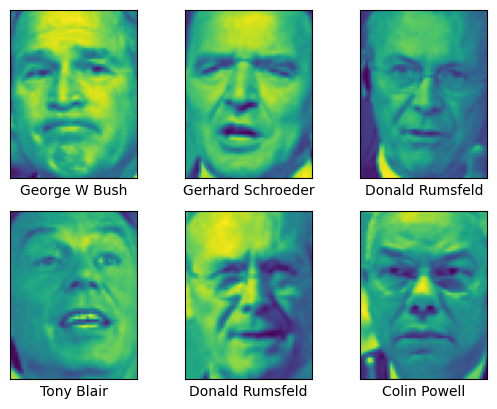

In [4]:
fig,ax=plt.subplots(2,3)
for i ,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i])
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (855, 2914)

Training data-y- Shape:	 (855,)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (285, 2914)

Testing data(y-Outcome) Shape:	 (285,)


In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca=PCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
pipe_model=make_pipeline(pca,svc)
#train the model
from sklearn.model_selection import GridSearchCV # to get optimum parameter
param_grid={'svc__C':[1,5,10,20,50],
 'svc__gamma':[0.0001,0.0005,0.001,0.005]
 }
grid=GridSearchCV(pipe_model,param_grid)
%time grid.fit(xtrain,ytrain)
print(grid.best_params_)

CPU times: total: 1min 34s
Wall time: 35.1 s
{'svc__C': 1, 'svc__gamma': 0.005}


In [7]:
model=grid.best_estimator_
print(model)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=1, class_weight='balanced', gamma=0.005))])


In [8]:
yfit=model.predict(xtest)
yfit

array([2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 4, 0, 0, 2, 0, 2, 0, 1, 4, 2,
       0, 1, 4, 2, 0, 1, 2, 2, 0, 3, 2, 2, 2, 2, 4, 2, 2, 4, 0, 0, 2, 4,
       2, 0, 2, 1, 2, 0, 3, 2, 0, 2, 4, 0, 2, 0, 2, 3, 0, 3, 2, 2, 4, 2,
       3, 4, 2, 1, 0, 1, 3, 1, 2, 4, 3, 2, 2, 2, 1, 0, 0, 4, 2, 2, 4, 4,
       4, 2, 0, 2, 2, 2, 2, 0, 4, 4, 2, 0, 1, 2, 0, 1, 3, 2, 3, 0, 2, 2,
       1, 2, 2, 4, 4, 2, 0, 3, 1, 0, 1, 3, 0, 3, 4, 2, 0, 0, 0, 2, 0, 0,
       4, 2, 1, 0, 2, 4, 0, 2, 2, 2, 2, 2, 3, 2, 2, 4, 0, 1, 2, 2, 4, 2,
       2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 4, 0,
       0, 2, 2, 0, 2, 3, 0, 1, 2, 4, 4, 2, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2,
       3, 2, 2, 3, 0, 4, 2, 0, 2, 2, 0, 1, 2, 2, 2, 3, 2, 2, 4, 2, 0, 2,
       1, 3, 0, 2, 2, 1, 4, 2, 0, 2, 2, 2, 0, 4, 2, 0, 0, 0, 2, 1, 2, 0,
       0, 3, 4, 2, 2, 0, 0, 3, 2, 0, 0, 2, 2, 4, 2, 1, 4, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 4, 3, 0, 4, 0, 2, 2, 2, 2, 2, 2, 0, 4, 2, 2],
      dtype=int64)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

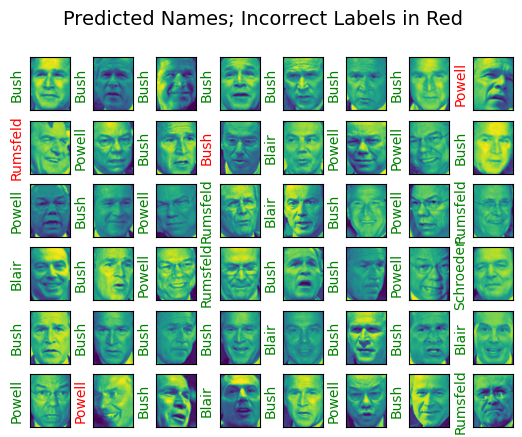

In [9]:
fig,ax=plt.subplots(6,8)
for i ,axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(62,47))
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='green'
 if yfit[i]==ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

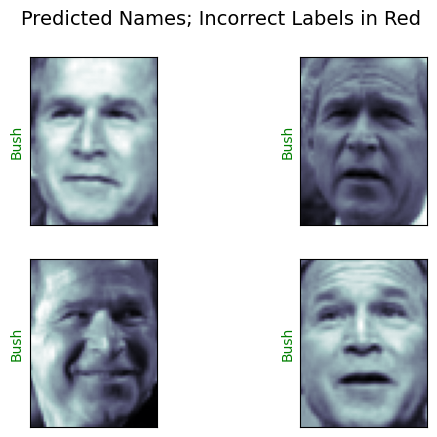

In [10]:
fig,ax=plt.subplots(2,2)
for i ,axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='green'
 if yfit[i]==ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

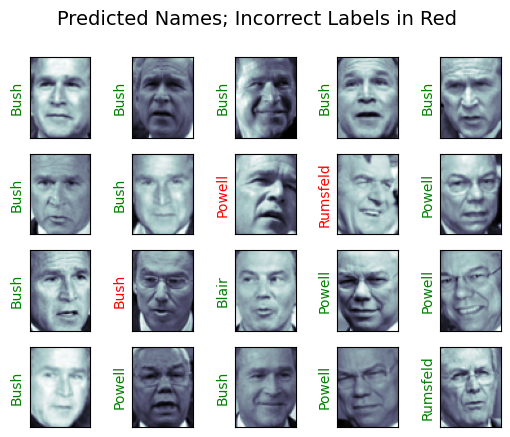

In [11]:
fig,ax=plt.subplots(4,5)
for i ,axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='green'
 if yfit[i]==ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14)

In [12]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('='*80)
print('Accuracy Score:\n',accuracy_score(ytest,yfit))
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,yfit))
print('-'*80)
print('Classification Report:\n',classification_report(ytest,yfit))
print('='*80)

Accuracy Score:
 0.887719298245614
Confusion Matrix:
 [[ 62   0   1   0   0]
 [  1  20   3   0   2]
 [  4   3 119   0   0]
 [  1   2   6  19   1]
 [  3   0   2   3  33]]
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.93        63
           1       0.80      0.77      0.78        26
           2       0.91      0.94      0.93       126
           3       0.86      0.66      0.75        29
           4       0.92      0.80      0.86        41

    accuracy                           0.89       285
   macro avg       0.87      0.83      0.85       285
weighted avg       0.89      0.89      0.88       285



Text(50.72222222222221, 0.5, 'Predicted label')

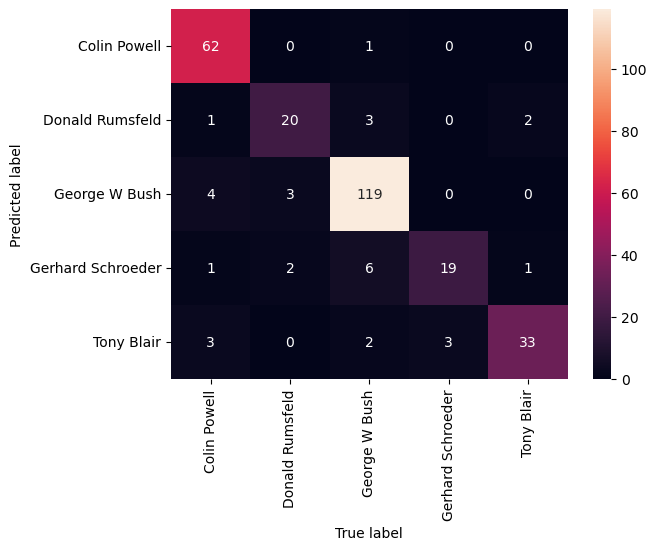

In [13]:
cm=confusion_matrix(ytest,yfit)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')